In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333162 entries, 0 to 2333161
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   center_id     int64 
 1   center_name   object
 2   center_city   object
 3   center_state  object
 4   serial_no     int64 
 5   score         int64 
dtypes: int64(3), object(3)
memory usage: 106.8+ MB


In [4]:
data.describe()

,center_id,serial_no,score
count,2.333162e+06,2.333162e+06,2.333162e+06
mean,3.224020e+05,2.902341e+02,2.171566e+02
std,1.049598e+05,2.171436e+02,1.662400e+02
min,1.101010e+05,1.000000e+00,-1.800000e+02
25%,2.602020e+05,1.240000e+02,8.700000e+01
50%,3.111190e+05,2.510000e+02,1.630000e+02
75%,4.122060e+05,4.080000e+02,3.130000e+02
max,9.914010e+05,1.968000e+03,7.200000e+02


In [5]:
data.isnull().sum()

center_id         0
center_name       0
center_city       0
center_state    304
serial_no         0
score             0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.sample(5)

,center_id,center_name,center_city,center_state,serial_no,score
532985,300311,"SHRI G. S. INSTITUTE OF TECHNOLOGY & SCIENCE, ...",INDORE,MADHYA PRADESH,527,374
1632419,311061,"COLLEGE OF HOME SCIENCE, NIRMALA NIKETAN, COLL...",MUMBAI,MAHARASHTRA,81,545
451298,250309,GOVT BOYS MODEL HIGHER SEC. SCHOOL BIJBARAHA A...,ANANTNAG,JAMMU & KASHMIR,335,80
168401,390315,"MAHESHWARI PUBLIC SCHOOL, NEAR SUSHANT CITY-1 ...",JAIPUR,RAJASTHAN,719,354
1019925,412302,"AMRITA VIDYALAYAM AMRITA NAGAR, VADAKUDI ROAD,...",NAGAPATTINAM,TAMIL NADU,85,91


In [8]:
data.shape

(2333162, 6)

In [9]:
data[['center_id']].value_counts()

center_id
220701       1968
220501       1836
150201       1746
271201       1738
460308       1695
             ... 
991401         53
990801         21
990901         14
990501          9
990401          8
Name: count, Length: 4750, dtype: int64

In [10]:
data[['score']].value_counts()

score
 75      16157
 70      16153
 80      15974
 65      15811
 85      15784
         ...  
-98          1
-96          1
-92          1
-81          1
-170         1
Name: count, Length: 800, dtype: int64

In [11]:
data.head()

,center_id,center_name,center_city,center_state,serial_no,score
0,272807,"KASTURBA GIRLS PU COLLEGE, KASTURBA GIRLS PU C...",SHIVAMOGA (SHIMOGA),KARNATAKA,1,42
1,272807,"KASTURBA GIRLS PU COLLEGE, KASTURBA GIRLS PU C...",SHIVAMOGA (SHIMOGA),KARNATAKA,2,172
2,272807,"KASTURBA GIRLS PU COLLEGE, KASTURBA GIRLS PU C...",SHIVAMOGA (SHIMOGA),KARNATAKA,3,42
3,272807,"KASTURBA GIRLS PU COLLEGE, KASTURBA GIRLS PU C...",SHIVAMOGA (SHIMOGA),KARNATAKA,4,222
4,272807,"KASTURBA GIRLS PU COLLEGE, KASTURBA GIRLS PU C...",SHIVAMOGA (SHIMOGA),KARNATAKA,5,129


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

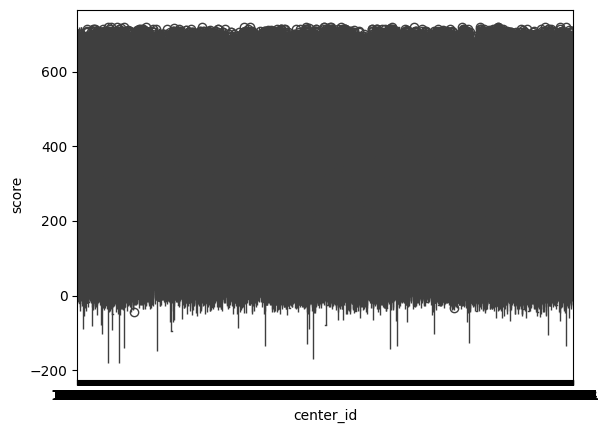

In [13]:
# Box plot
sns.boxplot(x='center_id', y='score', data=data)
plt.show()

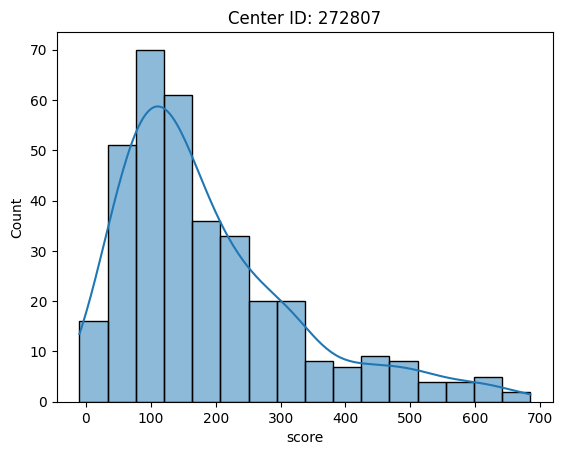

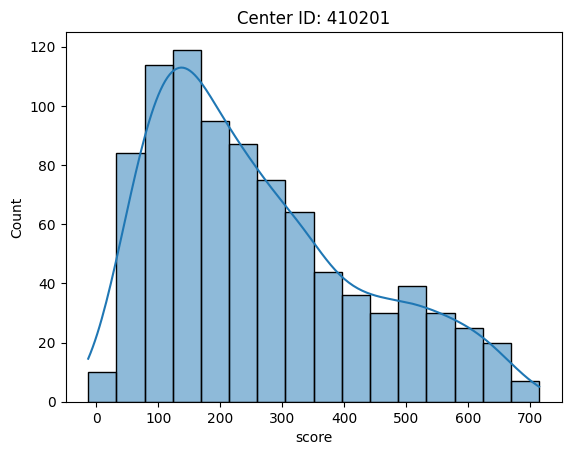

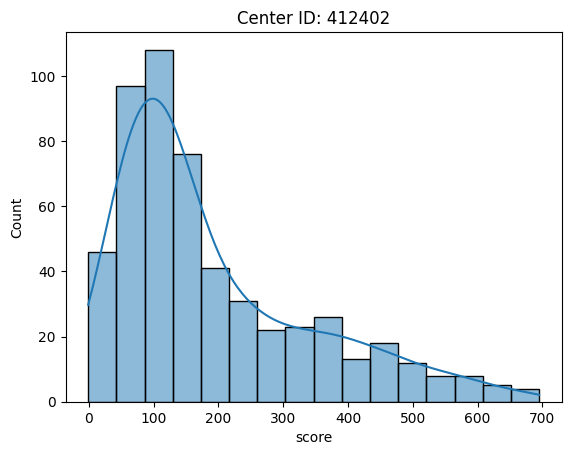

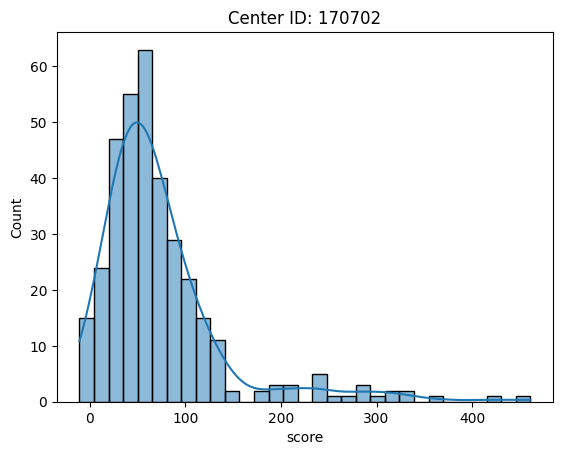

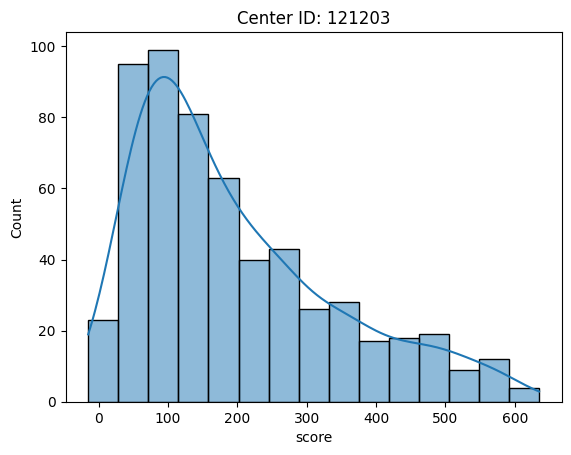

In [14]:
# Histograms (for a subset of centers)
for center in data['center_id'].unique()[:5]:  # Adjust the number of centers
    sns.histplot(data[data['center_id'] == center], x='score', kde=True)
    plt.title(f'Center ID: {center}')
    plt.show()


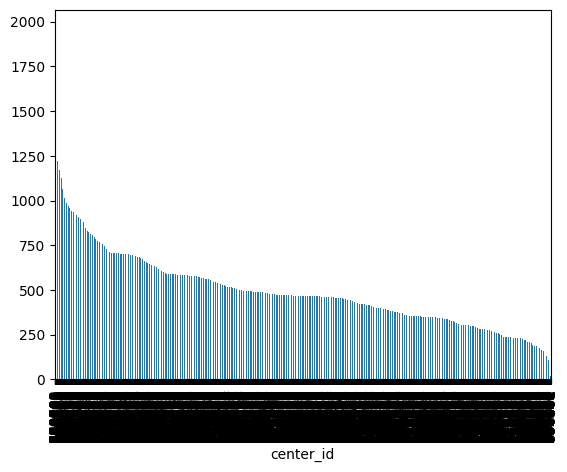

In [15]:
data['center_id'].value_counts().plot(kind='bar')
plt.show()

In [16]:
# Filling with previous value
df=data.fillna(method='ffill')

/tmp/ipykernel_13973/2064562186.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=data.fillna(method='ffill')


In [17]:
df.isnull().sum()

center_id       0
center_name     0
center_city     0
center_state    0
serial_no       0
score           0
dtype: int64

In [18]:
highest_scores = df.groupby('center_id')['score'].max()
print(highest_scores)

center_id
110101    680
110102    670
110103    648
120101    700
120102    676
         ... 
991001    677
991101    662
991201    656
991301    697
991401    608
Name: score, Length: 4750, dtype: int64


In [19]:
highest_scores = df.groupby('center_id')['score'].min()
print(highest_scores)

center_id
110101    -5
110102    10
110103    11
120101    -3
120102    -5
          ..
991001    29
991101    20
991201    11
991301    -5
991401    29
Name: score, Length: 4750, dtype: int64


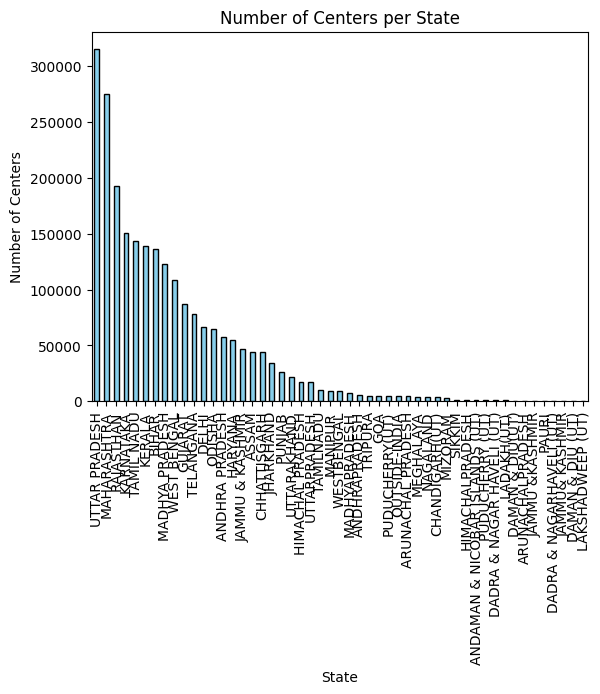

In [20]:
# Bar chart: Number of centers per state
state_counts = df['center_state'].value_counts()
state_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Centers per State')
plt.xlabel('State')
plt.ylabel('Number of Centers')
plt.show()


In [21]:
state_wise_score_count = df.groupby('center_state')['score'].count()

print(state_wise_score_count)

center_state
ANDAMAN & NICOBAR ISLANDS (UT)      1025
ANDHRA PRADESH                     57950
ANDHRAPRADESH                       5896
ARUNACHAL PRADESH                   4269
ARUNACHALPRADESH                     505
ASSAM                              44273
BIHAR                             136193
CHANDIGARH(UT)                      3530
CHHATTISGARH                       44241
DADRA & NAGAR HAVELI (UT)            898
DADRA & NAGARHAVELI (UT)             309
DAMAN & DIU (UT)                     261
DAMAN & DIU(UT)                      508
DELHI                              66090
GOA                                 4930
GUJARAT                            86952
HARYANA                            54864
HIMACHAL PRADESH                   17635
HIMACHALPRADESH                     1429
JAMMU & KASHMIR                    46753
JAMMU &KASHMIR                       492
JAMMU& KASHMIR                       308
JHARKHAND                          34404
KARNATAKA                         150897
KER

In [22]:
df['score'].value_counts()[720] #neet 2024 result xd

61

In [23]:
df.sample(5)

,center_id,center_name,center_city,center_state,serial_no,score
602666,360509,DR DEV MOHANTY PUBLIC SCH KHANDASAHI CUTTACK O...,CUTTACK,ODISHA,182,109
590447,380303,"HANSRAJ MAHILA MAHA VIDYALAYA, MAHATMA HANS RA...",JALANDHAR,PUNJAB,172,61
522089,311234,"PINNACLE INTERNATIONAL SCHOOL WING A, KAKANDI ...",NANDED,MAHARASHTRA,37,526
209386,441105,"RAJ ENGLISH SCHOOL, SHIVPURAVA SARNATH PAHARIA...",VARANASI,UTTAR PRADESH,411,96
1028858,311108,"ARMY PUBLIC SCHOOL KAMPTEE, ARMY PUBLIC SCHOOL...",NAGPUR,MAHARASHTRA,695,154


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333162 entries, 0 to 2333161
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   center_id     int64 
 1   center_name   object
 2   center_city   object
 3   center_state  object
 4   serial_no     int64 
 5   score         int64 
dtypes: int64(3), object(3)
memory usage: 106.8+ MB


In [25]:
pivot_table = df.pivot_table(index='center_id', values='score', aggfunc=['mean', 'count', 'min', 'max'])
print(pivot_table)

                 mean count   min   max
                score score score score
center_id                              
110101     192.112798   461    -5   680
110102     192.594360   461    10   670
110103     196.174757   103    11   648
120101     275.125535   701    -3   700
120102     275.250853   586    -5   676
...               ...   ...   ...   ...
991001     260.895197   229    29   677
991101     271.727564   312    20   662
991201     208.413357   554    11   656
991301     247.884462   753    -5   697
991401     244.245283    53    29   608

[4750 rows x 4 columns]


In [26]:
from sklearn.preprocessing import LabelEncoder


categorical_cols = ['center_city', 'center_state']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

print(df)


         center_id                                        center_name  \
0           272807  KASTURBA GIRLS PU COLLEGE, KASTURBA GIRLS PU C...   
1           272807  KASTURBA GIRLS PU COLLEGE, KASTURBA GIRLS PU C...   
2           272807  KASTURBA GIRLS PU COLLEGE, KASTURBA GIRLS PU C...   
3           272807  KASTURBA GIRLS PU COLLEGE, KASTURBA GIRLS PU C...   
4           272807  KASTURBA GIRLS PU COLLEGE, KASTURBA GIRLS PU C...   
...            ...                                                ...   
2333157     250301  AYESHA ALI ACADEMY, KANIPORA KULGAM, J&K, ANAN...   
2333158     250301  AYESHA ALI ACADEMY, KANIPORA KULGAM, J&K, ANAN...   
2333159     250301  AYESHA ALI ACADEMY, KANIPORA KULGAM, J&K, ANAN...   
2333160     250301  AYESHA ALI ACADEMY, KANIPORA KULGAM, J&K, ANAN...   
2333161     250301  AYESHA ALI ACADEMY, KANIPORA KULGAM, J&K, ANAN...   

         center_city  center_state  serial_no  score  
0                494            23          1     42  
1            

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressorfrom sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# after running the upper above code then put the value of df_encorded in x

# Separate features and target variable
X = df[['center_id', 'center_city', 'center_state']]  # Add more features as needed
y = df['score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# after running the upper above code then put the value of df_encorded in x

# Separate features and target variable
X = df[['center_id', 'center_city', 'center_state']]  # Add more features as needed
y = df['score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 25140.529219413183
